## **An Exploration of Rocket Launch Data: Success Rates, Failures, Annual Trends, and Launch Costs**


**Introduction:**

In this era of rapidly evolving technology and space exploration, understanding the dynamics of rocket launches is critical. By delving into data analysis, we can unearth important information regarding the efficiency, costs, and activity levels of various organizations in the rocket launch industry.

In this analysis, we will investigate four main aspects:

1. **Rocket Launch Success and Failure Rate:**  
   - The proportion of successful missions compared to failed ones can illustrate the efficiency of the industry. A higher success rate may indicate technological advancements, better preparation, or a more experienced team. Conversely, understanding the reasons behind failures can point to areas for improvement and risk mitigation.
     
   
2. **Most Active Organizations:**  
   - Identifying organizations that frequently launch rockets provides insight into the dominant organizations in the market. This data can give clues as to which organizations are leading in terms of technology, funding, or global collaboration. The frequency also sets the bar for new organizations in terms of ac

3. **Annual Launch Trends:**  
   - Analyzing annual trends gives an idea of how the rocket launch industry has evolved over time. An upward trend may indicate a growing interest in space exploration, increased funding, or technological advancements. On the other hand, a downward trend may indicate market saturation, waning interest, or external factors such as global economic setbacks affecting launches.


4. **Cost Distribution of Rocket Launches:**  
   - Understanding the cost structure is key to assessing the financial viability of an investment in the rocket launch industry. A wide distribution of costs may indicate the presence of launches from low budget, perhaps for academic or research purposes, to high budget launches, perhaps for complex missions or commercial ventures.


Through these aspects, we aim to provide an in-depth understanding of the current dynamics of the rocket launch industry. Such insights are invaluable to investors, researchers, policy makers and other stakeholders.tivity levels. version)entingan lainnya.

### **Import the Library that will be Used**

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import geopandas as gpd


### **1. Loading Data**
In this section, we use the `pandas` library to load a dataset from a CSV file into a DataFrame. The dataset contains information about rocket launches. After loading, we display the first five rows of the dataset to get an initial overview of the data.

In [4]:
# Memuat data dari CSV ke DataFrame
data = pd.read_csv('C:/Users/User/Documents/Portofolio/Space+Missions+(start)/mission_launches.csv')

# Menampilkan 5 baris pertama dari data
data.head()


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


### **2. Data Pre-processing**
In this section, we perform several steps to clean up the data
- Removing unnecessary columns, namely the `unnamed: 0` and `unnamed: 0.1` columns.
- Change the format of the `Date` column to the `datetime` data type to make it easier to process in the next step.
- Displayed the first five rows of the cleaned data to ensure the changes had been applied correctly.

In [5]:
# Menghapus kolom yang tidak diperlukan
data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

# Mengubah kolom Date menjadi tipe data datetime
data['Date'] = pd.to_datetime(data['Date'])

# Menampilkan 5 baris pertama dari data yang telah dibersihkan
data.head()


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success


### **3. Comparison of the Number of Active Rockets with Retired Rockets**

Analyze and compare the number of rockets that are still active with those that are retired or no longer active based on the data provided.



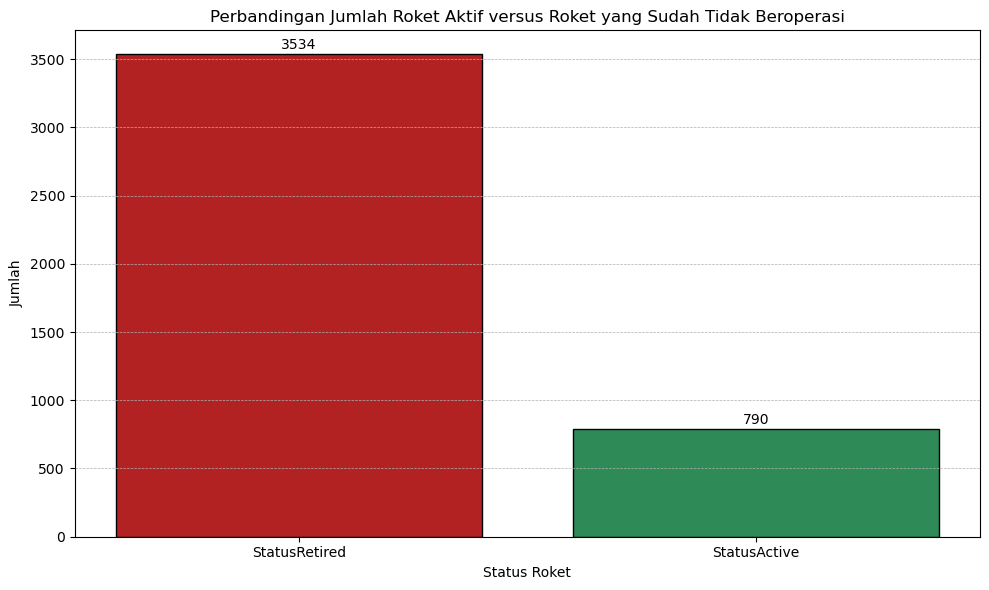

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

In [6]:
# Menghitung jumlah roket yang aktif versus yang pensiun
rocket_status_counts = data['Rocket_Status'].value_counts()

# Membuat grafik batang untuk perbandingan roket aktif dan yang pensiun
plt.figure(figsize=(10, 6))
bars = plt.bar(rocket_status_counts.index, rocket_status_counts.values, color=['firebrick', 'seagreen'], edgecolor='black')

# Menambahkan nilai di atas setiap batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 15, int(yval), ha='center', va='bottom', fontsize=10)

plt.title('Perbandingan Jumlah Roket Aktif versus Roket yang Sudah Tidak Beroperasi')
plt.xlabel('Status Roket')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

rocket_status_counts


#### **Graphic Interpretation**

- The majority of rockets, 3,534, are inactive or retired and only 790 rockets are still active.
- A large number of rockets that have been launched have completed their missions or are no longer operationally viable.
- Rockets that are still active may still be in operation or ready for future missions. Older rockets may be replaced with newer, more advanced and efficient models.
- Changes in the number of active and retired rockets can reflect the evolution of rocket technology and organizational policies over time.

### **4. Rocket Launch Status Analysis**

In this section, we analyze the distribution of rocket launches based on their mission status. Using the `value_counts()` function, we count the number of launches for each mission status in the dataset. The result will show how many missions succeeded, failed, or had other statuses.

In [7]:
# Menghitung jumlah peluncuran berdasarkan status misinya
mission_status_counts = data['Mission_Status'].value_counts()

mission_status_counts

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

#### **Launch Status Visualization**

In this section, we visualize the data that has been analyzed in the previous step. Using the `matplotlib` library, we create a barchart to display the number of launches based on their mission status.

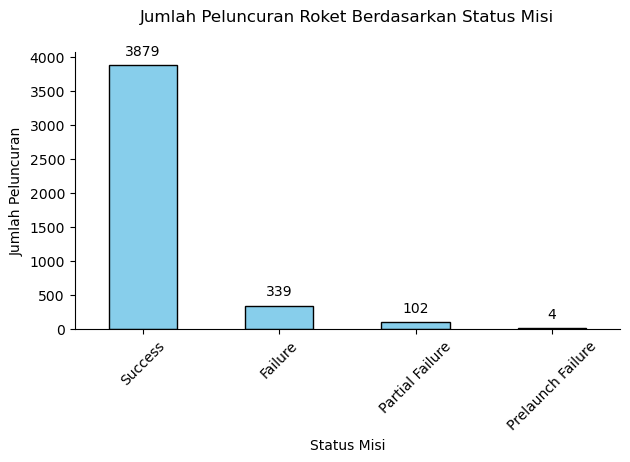

In [8]:
# Menambahkan ruang di antara plot dan judul
ax = mission_status_counts.plot(kind='bar', color='skyblue', edgecolor='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title("Jumlah Peluncuran Roket Berdasarkan Status Misi", y=1.08)  # Menyesuaikan posisi judul
plt.xlabel("Status Misi")
plt.ylabel("Jumlah Peluncuran")
plt.xticks(rotation=45)

# Menambahkan nilai asli di atas setiap batang
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


The barchart above shows the number of rocket launches based on their mission status. The following is the interpretation of the above barchart:

1. **Success:** With 3879 launches, this is the most common status. This indicates that most of the rocket launch missions successfully reached their destination without any problems. 

2. **Failure:** There were 339 missions that failed. While this is much less than the number of successful missions, it still indicates that there are risks involved in rocket launches.

3. **Partial Failure:** There were 102 missions that experienced partial failure. This means that the mission may have achieved part of its goal, but not quite what was expected.

4. **Prelaunch Failure:** There were only 4 missions that failed before launch. This shows that this kind of incident is very rare, but it is still important to be aware of.

In conclusion, while the vast majority of rocket launch missions are successful, there are still a number of missions that experience failures, be it complete failures, partial failures, or even pre-launch failures. This reminds us of the complexities and challenges that exist within the spaceflight industry.

### **5. Time-Series Analysis of Number of Rocket Launches**

In this analysis, we want to know how the trend of rocket launches changes over time, specifically each year. By grouping the data by the year of the launch date, we can calculate how many times the rocket was launched each year. we use time series to display the trend of the number of rocket launches each year. Time series provide a clear picture of how the trend changes from year to year.

#### **Rocket Launches per Year**

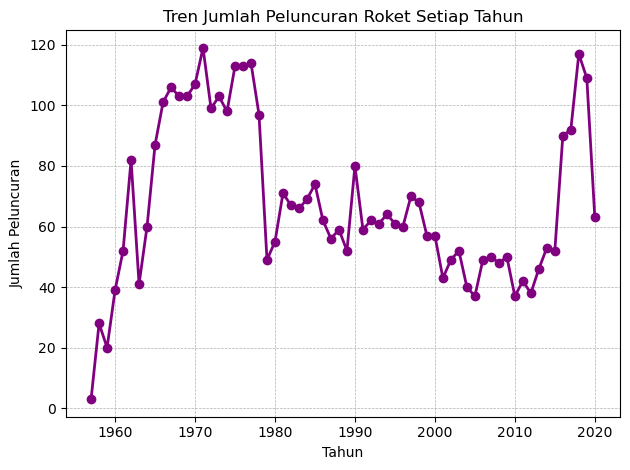

In [9]:
# Menghilangkan informasi zona waktu dengan cara lain
data['Date'] = data['Date'].apply(lambda x: x.replace(tzinfo=None))

# Menghitung jumlah peluncuran roket setiap tahun
yearly_launches = data.groupby(data['Date'].dt.year)['Date'].count()

# Membuat line chart untuk tren jumlah peluncuran roket setiap tahun
yearly_launches.plot(kind='line', color='purple', marker='o', linewidth=2)
plt.title("Tren Jumlah Peluncuran Roket Setiap Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Peluncuran")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()





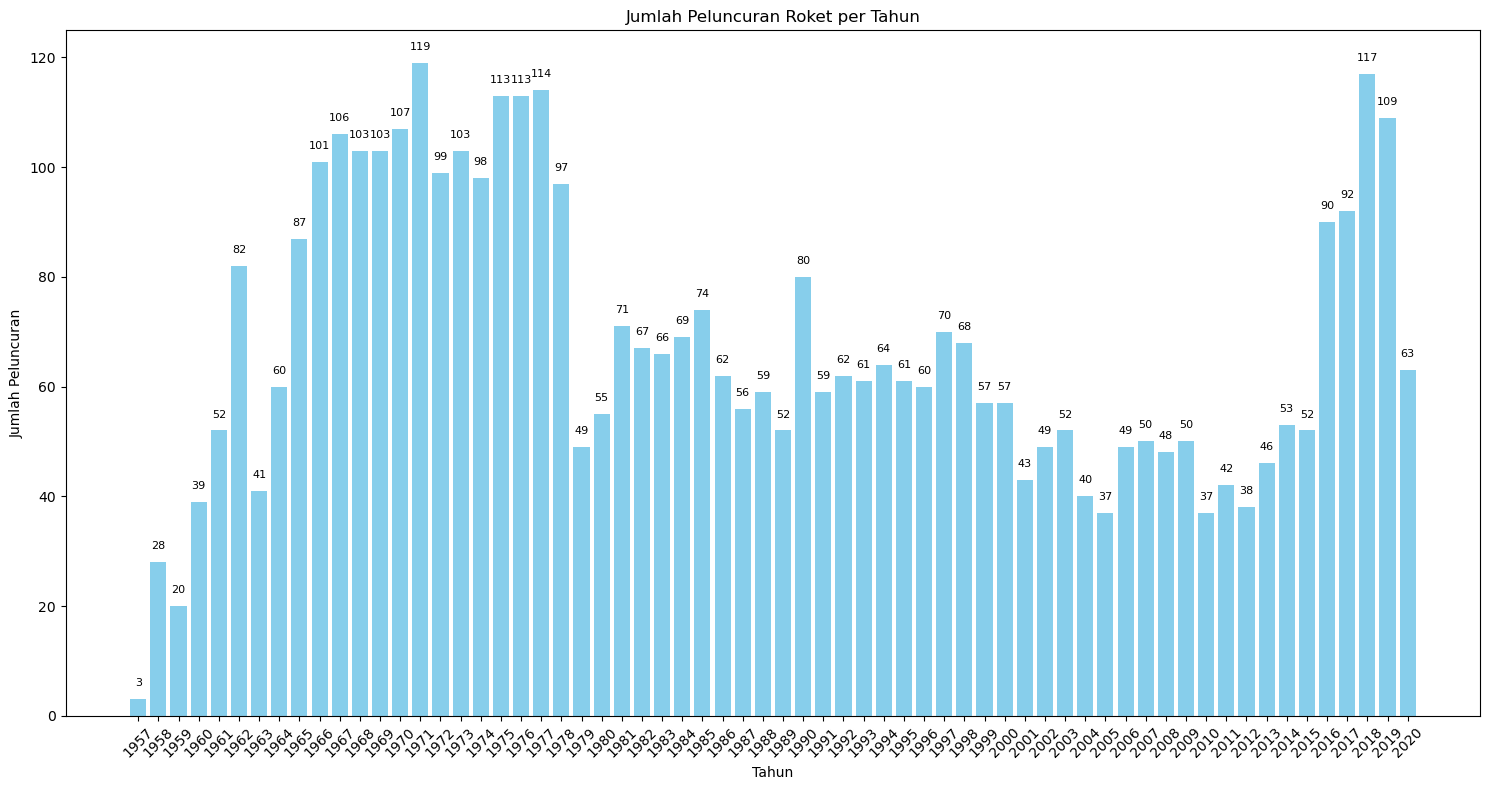

In [10]:
# Mengambil informasi tahun dari kolom "Date" dengan pemrosesan string
data['Year'] = data['Date'].astype(str).str.split('-').str[0]

# Menghitung jumlah peluncuran per tahun
launches_per_year = data.groupby('Year').size()

launches_per_year


plt.figure(figsize=(15, 8))
bars = plt.bar(launches_per_year.index, launches_per_year.values, color='skyblue')

# Menambahkan nilai di atas setiap batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, int(yval), ha='center', va='bottom', fontsize=8)

plt.title('Jumlah Peluncuran Roket per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Peluncuran')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


#### **Chart Interpretation**
- Overall, there appears to have been a significant increase in the number of rocket launches from the 1960s to around the mid-1970s, peaking in the mid-to-late 1970s.
- After peaking in the late 1970s, there was a decline in the number of rocket launches that continued until around the early 2000s.
- Starting from the mid-2000s, there seems to be a steady trend in the number of rocket launches each year with some fluctuations.
- Finally, in the last few years available in the dataset, there seems to be a rebound in the number of rocket launches. However, in the years where the Covid-19 pandemic emerged, there was a significant decrease after an increase in 2015-2018.

From this graph, we can conclude that there are certain periods in the history of rocket launches where the activity becomes very intensive, followed by periods of decreased activity. Factors such as technological developments, government policies, geopolitical dynamics, and the impact of the pandemic may have played a role in influencing these trends.

#### **Rocket Launches per Month**

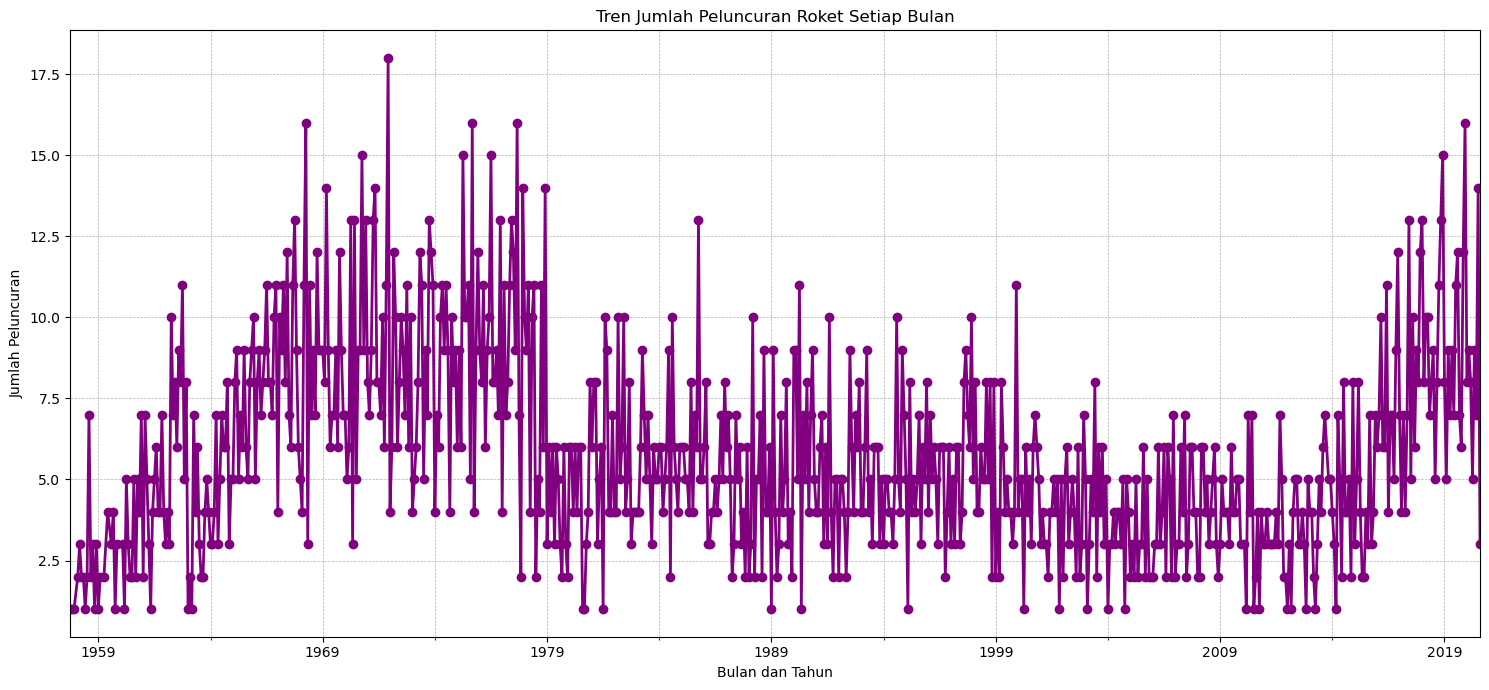

In [11]:
# Menghapus informasi zona waktu dan mengkonversi kembali kolom "Date" ke tipe data datetime
data['Date'] = pd.to_datetime(data['Date'].astype(str).str.split('+').str[0])

# Menghitung jumlah peluncuran roket setiap bulan
monthly_launches = data.groupby(data['Date'].dt.to_period("M"))['Date'].count()

# Membuat line chart untuk tren jumlah peluncuran roket setiap bulan
plt.figure(figsize=(15, 7))
monthly_launches.plot(kind='line', color='purple', marker='o', linewidth=2)
plt.title("Tren Jumlah Peluncuran Roket Setiap Bulan")
plt.xlabel("Bulan dan Tahun")
plt.ylabel("Jumlah Peluncuran")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


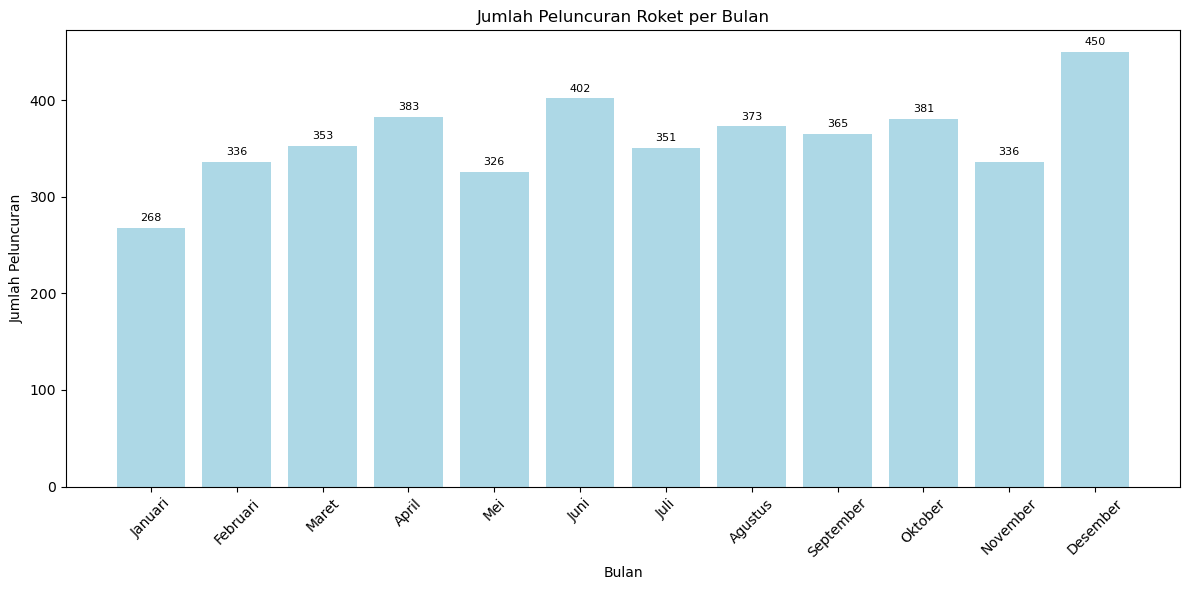

In [12]:
# Mengekstrak informasi bulan dari string tanggal
data['Month'] = data['Date'].astype(str).str.split('-').str[1]

# Menghitung jumlah peluncuran untuk setiap bulan
launches_per_month_total = data.groupby('Month').size()

launches_per_month_total


# Membuat grafik batang untuk jumlah peluncuran per bulan
months = ["Januari", "Februari", "Maret", "April", "Mei", "Juni", "Juli", "Agustus", "September", "Oktober", "November", "Desember"]

plt.figure(figsize=(12, 6))
bars = plt.bar(months, launches_per_month_total.values, color='lightblue')

# Menambahkan nilai di atas setiap batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom', fontsize=8)

plt.title('Jumlah Peluncuran Roket per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peluncuran')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()



#### **Chart Interpretation**
- Highest Launches in December**: With 450 launches, December showed the highest rocket launch activity compared to other months. This may be attributed to various factors, such as weather conditions, mission planning, or other factors that favor launches in this month.

- **High Activity in the Middle of the Year**: June to October shows a relatively high number of launches, which may indicate a favorite period for rocket launches.

- Lowest Launches in January**: With 268 launches, January had the lowest rocket launch activity. This may be due to factors such as weather conditions earlier in the year or less mission planning in this month.

- **Launch Distribution**: While there are some differences between months, there are no extreme differences in the distribution of rocket launches throughout the year. This suggests that rocket launches occur with a relatively stable frequency throughout the year.

From the above interpretation, we can conclude that while there is some variation in the number of rocket launches from month to month, rocket launches are a year-round activity with some peaks and valleys.

### **6. Analysis of Number of Rocket Launches by Organization**

In this analysis, we investigate which organizations are most active in launching rockets. Using the `value_counts()` function, we count the number of launches for each organization listed in the dataset. The results show the organizations with the most rocket launch activity.

In [13]:
# Menghitung jumlah peluncuran roket berdasarkan organisasinya
organisation_counts = data['Organisation'].value_counts()

# Menampilkan 10 organisasi dengan jumlah peluncuran terbanyak
top_organisations = organisation_counts.head(10)

top_organisations


RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
Name: Organisation, dtype: int64

#### **Visualization of Number of Launches by Organization**

In this visualization, we leverage the matplotlib library to create a bar graph displaying the 10 organizations with the most number of rocket launches. This graph provides a visual representation of the dominance of some organizations in the rocket launch industry.

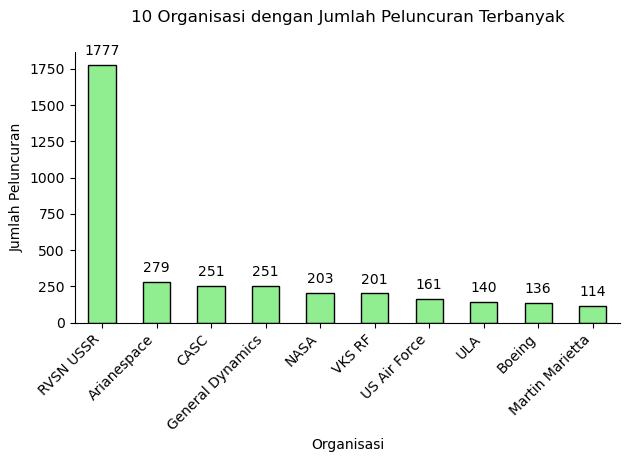

In [14]:
# Membuat bar chart untuk 10 organisasi dengan jumlah peluncuran terbanyak
ax2 = top_organisations.plot(kind='bar', color='lightgreen', edgecolor='black')
ax2.spines['top'].set_visible(False)  # Menghilangkan garis atas
ax2.spines['right'].set_visible(False)  # Menghilangkan garis kanan

plt.title("10 Organisasi dengan Jumlah Peluncuran Terbanyak", y=1.08)  # Menambahkan ruang di antara plot dan judul
plt.xlabel("Organisasi")
plt.ylabel("Jumlah Peluncuran")
plt.xticks(rotation=45, ha='right')

# Menambahkan nilai asli di atas setiap batang
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


**Chart Interpretation:**
- The **RVSN USSR** is the organization with the largest number of rocket launches, with more than 1700 launches. This shows the organization's dominance in the rocket launch industry, perhaps due to its important role during certain periods in history.
- **Arianespace** comes in second, with over 250 launches. Although far below the USSR's RVSN in terms of numbers, it remains an important organization in the industry.
- **CASC** and **General Dynamics** come in third and fourth with 251 launches. This shows the growth and strong presence of these organizations in the rocket launch world.
- Other organizations such as **VKS RF** and **NASA** also show significant activity in the industry, with over 200 launches each.
- There is a significant difference between the number of rocket launches of **RVSN USSR** and other organizations, showing the strong dominance of **RVSN USSR** during its operational period.

From this graph, we can conclude that some organizations have a dominant role in the history of rocket launches, either due to their history, technology, or certain policies they have.

### **7. Price Distribution Analysis of Rocket Launches**

In [15]:
# Analisis statistik deskriptif untuk kolom harga
price_description = data['Price'].describe()

price_description


count       964
unique       56
top       450.0
freq        136
Name: Price, dtype: object

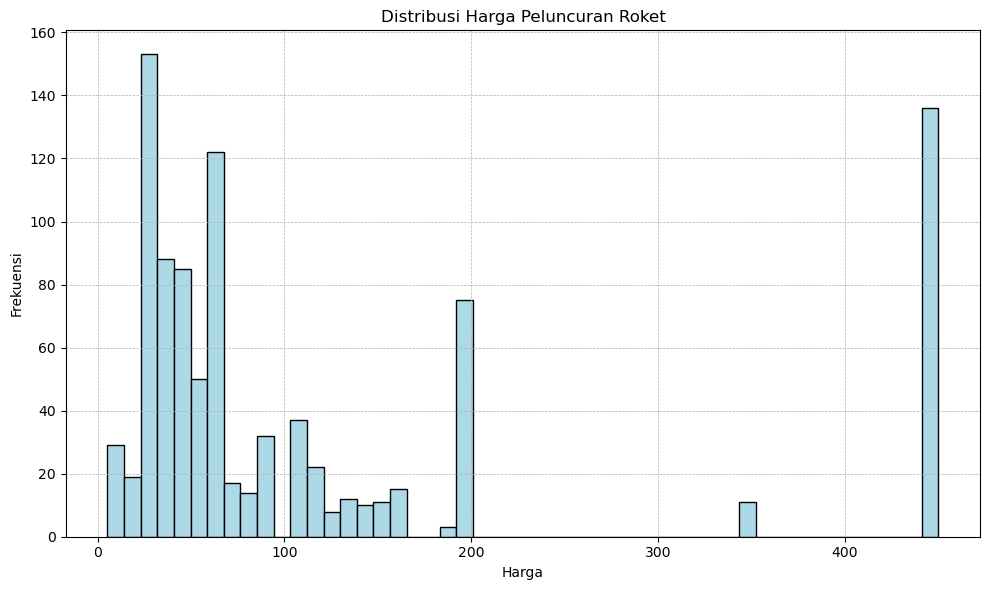

In [16]:
# Mengonversi kolom 'Price' menjadi tipe data numerik
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

# Membuat histogram untuk distribusi harga
plt.figure(figsize=(10, 6))
plt.hist(data['Price'].dropna(), bins=50, color='lightblue', edgecolor='black')
plt.title("Distribusi Harga Peluncuran Roket")
plt.xlabel("Harga")
plt.ylabel("Frekuensi")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


From the displayed histogram, we can make interpretations:
- **Price Concentration**: Most rocket launches have prices in the low to mid-range, with some clear peaks at some specific price points.
- **Highest Prices**: There are a few launches with very high prices, but their frequency is low when compared to the prices of mid-to-low priced launches. This suggests that the high-cost launches may have been specialized missions or used more expensive technology.
- **Distribution**: The price distribution appears to be asymmetrical, with a slope to the right. This suggests that most launches tend to have lower prices with a few exceptions that have higher prices.
- **Modus**: High frequency around the 450.0 price.

Thus, we can conclude that while there are a few rocket launches with very high costs, most rocket launches have relatively lower to medium costs.

### **8. Activity Distribution of Number of Rocket Launches per Country**

In [24]:
# Ekstraksi negara dari kolom 'Location'
data['Country'] = data['Location'].str.split(', ').str[-1]

# Menghitung jumlah peluncuran untuk setiap negara
launches_per_country = data['Country'].value_counts().reset_index()
launches_per_country.columns = ['Country', 'Number_of_Launches']

launches_per_country.head()



,Country,Number_of_Launches
0,Russia,1395
1,USA,1344
2,Kazakhstan,701
3,France,303
4,China,268


In [48]:
import plotly.express as px


fig = go.Figure(data=go.Choropleth(
    locations=launches_per_country['Country'],
    z=launches_per_country['Number_of_Launches'],
    locationmode='country names',
    colorscale="greens",
    autocolorscale=False,
    reversescale=False,
    marker_line_color='black',
    marker_line_width=0.5,
    colorbar_title='Number of Successful'
))

# Menyesuaikan latar belakang dan detail peta
fig.update_geos(
    showland=True,
    showcountries=True
)

fig.update_layout(
    title="Distribusi Aktivitas Keberhasilan Peluncuran Roket per Negara",
    geo=dict(
        showframe=False,
        showcoastlines=True
    )
)
# Menampilkan peta
fig.show()


#### **Chart Interpretation**
- From the map, we can see that some countries are darker in color, indicating that they have a high number of rocket launches. This may reflect the presence of large spaceflight institutions or companies in the country or the existence of government policies that support space exploration.
- In contrast, many countries with lighter colors show less or no rocket launch activity. This could be due to a variety of factors, such as technological limitations, budgets, or different national priorities.
- Overall, this map provides an overview of the leading countries in the rocket launch industry and shows how diverse the level of activity is around the world.

Here are the 10 countries with the highest number of rocket launches based on the data provided:

- **Russia** with 1,395 launches.
- **USA** with 1,344 launches
- **Kazakhstan** with 701 launches.
- **France** with 303 launches.
- **China** with 268 launches.
- **Japan** with 126 launches.
- **India** with 76 launches.
- **Iran** with 13 launches.
- **New Zealand** also with 13 launches.
- **Israel** with 11 launches.


From this list, we can see that Russia and Kazakhstan dominate in terms of the number of rocket launches, with Russia having almost twice as many launches as Kazakhstan. The other countries on the list also have significant contributions in the rocket launch industry.

### **9. Distribution of Rocket Launch Failure Activity by Country**

In [26]:
# Memfilter data untuk peluncuran yang gagal
failed_launches = data[data['Mission_Status'] == 'Failure']

# Menghitung jumlah peluncuran yang gagal untuk setiap negara
failed_launches_per_country = failed_launches['Country'].value_counts().reset_index()
failed_launches_per_country.columns = ['Country', 'Number_of_Failures']

failed_launches_per_country.head()



,Country,Number_of_Failures
0,USA,127
1,Kazakhstan,72
2,Russia,62
3,China,19
4,France,13


In [46]:

fig_failure = go.Figure(data=go.Choropleth(
    locations=failed_launches_per_country['Country'],
    z=failed_launches_per_country['Number_of_Failures'],
    locationmode='country names',
    colorscale="reds",
    autocolorscale=False,
    reversescale=False,
    marker_line_color='black',
    marker_line_width=0.5,
    colorbar_title='Number of Failures'
))

# Menyesuaikan latar belakang dan detail peta
fig_failure.update_geos(
    showland=True,
    showcountries=True
)

fig_failure.update_layout(
    title="Distribusi Aktivitas Kegagalan Peluncuran Roket per Negara",
    geo=dict(
        showframe=False,
        showcoastlines=True
    )
)
# Menampilkan peta
fig_failure.show()


#### **Chart Interpretation**

From the Choropleth Map showing the number of rocket launch failures per country, we can see that some countries have a higher number of failures compared to others. This may be due to various factors, including the total number of launches, the technology used, and the launch conditions.

List of 10 Countries with the Most Number of Rocket Launch Failures:

- **USA** with 127 failures.
- **Kazakhstan** with 72 failures.
- **Russia** with 62 failures.
- **China** with 19 failures.
- **France** with 13 failures.
- **Japan** with 10 failures.
- **India** with 8 failures.
- **Iran** also with 8 failures.
- **North Korea** with 3 failures.
- **Australia** also with 3 failures.

From the list above, Kazakhstan and Russia are the two countries with the most number of rocket launch failures. However, it is important to remember that these two countries also have a high number of rocket launches, so the absolute number of failures may not reflect the overall efficiency or reliability of their rocket launch programs.

### **10. Percentage of Rocket Launch Failures and Successes Over Time**

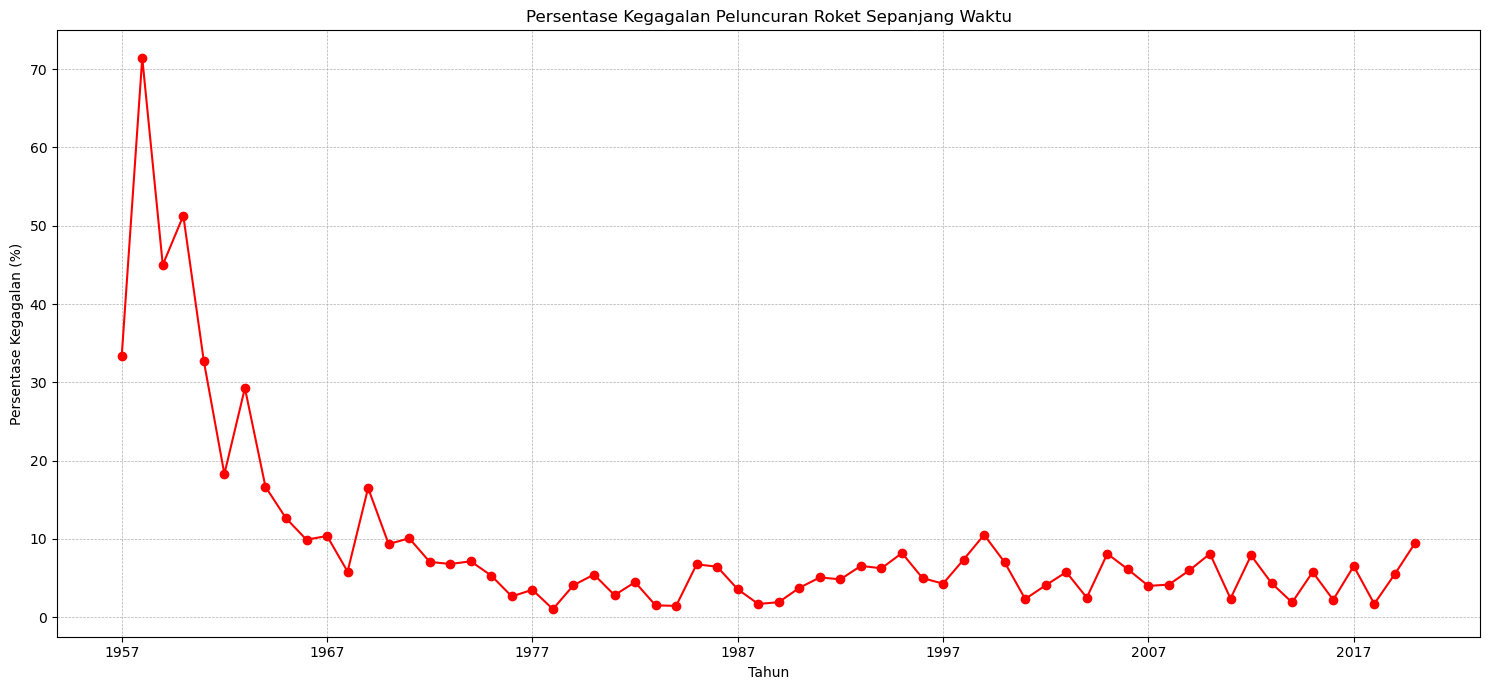

In [49]:
# Menghitung total misi dan total kegagalan per tahun
total_missions_per_year = data.groupby('Year').size()
failures_per_year = data[data['Mission_Status'] == 'Failure'].groupby('Year').size()

# Menghitung persentase kegagalan
failure_percentage_per_year = (failures_per_year / total_missions_per_year) * 100

failure_percentage_per_year.head()

plt.figure(figsize=(15, 7))
failure_percentage_per_year.plot(linestyle='-', marker='o', color='red')

plt.title('Persentase Kegagalan Peluncuran Roket Sepanjang Waktu')
plt.xlabel('Tahun')
plt.ylabel('Persentase Kegagalan (%)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()


- **High Initial Failure**: In the early years of space exploration (late 1950s to early 1960s), the percentage of failures was quite high, reaching over 70% in some years.

- **Continuous Improvement**: Since the mid-1960s, there has been a consistent downward trend in the percentage of failures. This shows that countries started to improve their launch technologies and procedures, reducing the risk of failure.

- **Increased Stability in the 2000s**: In the decade of the 2000s, the percentage of failures became more stable and relatively low, indicating that launch technologies have become more mature and reliable.

- **Low Failures in Recent Years**: In recent years, the percentage of failures has been very low, indicating significant progress in rocket launch technology and success.

From this interpretation, we can conclude that countries have indeed improved their ability to launch rockets over time, with a diminishing risk of failure.failure.

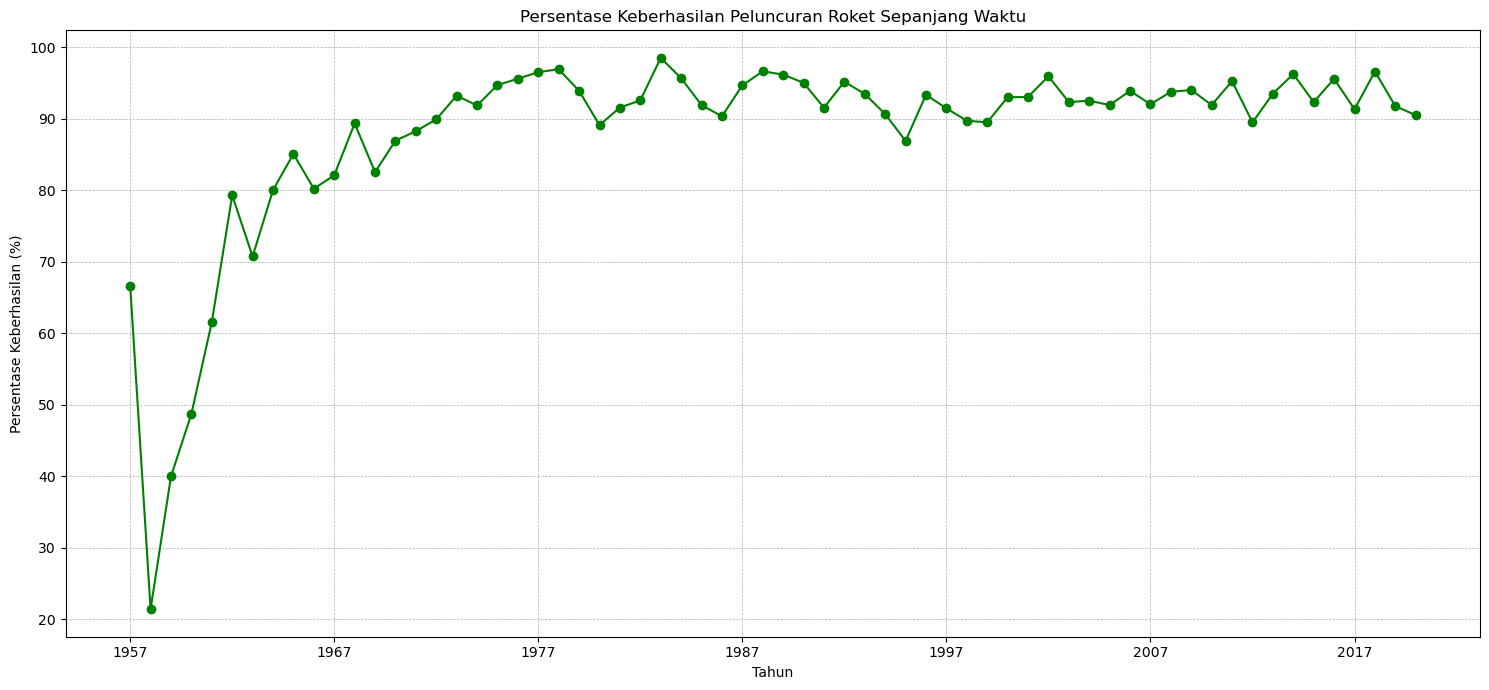

In [50]:
# Menghitung total keberhasilan per tahun
successes_per_year = data[data['Mission_Status'] == 'Success'].groupby('Year').size()

# Menghitung persentase keberhasilan
success_percentage_per_year = (successes_per_year / total_missions_per_year) * 100

# Membuat grafik garis untuk persentase keberhasilan
plt.figure(figsize=(15, 7))
success_percentage_per_year.plot(linestyle='-', marker='o', color='green')

plt.title('Persentase Keberhasilan Peluncuran Roket Sepanjang Waktu')
plt.xlabel('Tahun')
plt.ylabel('Persentase Keberhasilan (%)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()


- **Low Initial Success**: In the early years of space exploration (late 1950s to early 1960s), the percentage of success was relatively low, below 50% in some years.

- **Continued Improvement**: Since the mid-1960s, there has been a consistent upward trend in the success percentage. This shows that countries started to improve their launch technologies and procedures, increasing the chances of success.

- **High Stability in the 2000s**: In the decade of the 2000s, the success percentage became more stable and relatively high, indicating that launch technologies have become more mature and reliable.

- **High Success in Recent Years**: In recent years, the success percentage has been very high, approaching 100% in some years, indicating the effectiveness and reliability of current launch technology.

From this interpretation, we can conclude that countries have significantly improved their ability to launch rockets over time, with an increasing chance of success.